In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.backends.backend_pdf import PdfPages

C:\Users\damir\AppData\Local\Temp\ipykernel_9980\281783146.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pdf = PdfPages("Figures.pdf")

In [3]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [4]:
data = pd.read_csv('BankChurners.csv', index_col=0)
data.rename(
    columns={
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'NB_clf_1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NB_clf_2'
        },
    inplace=True
    )

In [5]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NB_clf_1,NB_clf_2
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
data.iloc[:, :12].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10127 entries, 768805383 to 714337233
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition_Flag            10127 non-null  object
 1   Customer_Age              10127 non-null  int64 
 2   Gender                    10127 non-null  object
 3   Dependent_count           10127 non-null  int64 
 4   Education_Level           10127 non-null  object
 5   Marital_Status            10127 non-null  object
 6   Income_Category           10127 non-null  object
 7   Card_Category             10127 non-null  object
 8   Months_on_book            10127 non-null  int64 
 9   Total_Relationship_Count  10127 non-null  int64 
 10  Months_Inactive_12_mon    10127 non-null  int64 
 11  Contacts_Count_12_mon     10127 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.0+ MB


In [7]:
data.iloc[:, 12:].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10127 entries, 768805383 to 714337233
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Credit_Limit           10127 non-null  float64
 1   Total_Revolving_Bal    10127 non-null  int64  
 2   Avg_Open_To_Buy        10127 non-null  float64
 3   Total_Amt_Chng_Q4_Q1   10127 non-null  float64
 4   Total_Trans_Amt        10127 non-null  int64  
 5   Total_Trans_Ct         10127 non-null  int64  
 6   Total_Ct_Chng_Q4_Q1    10127 non-null  float64
 7   Avg_Utilization_Ratio  10127 non-null  float64
 8   NB_clf_1               10127 non-null  float64
 9   NB_clf_2               10127 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 870.3 KB


In [8]:
limit_on_months = data.groupby('Months_on_book')['Credit_Limit'].agg(['mean'])
months = limit_on_months.index
limits = limit_on_months.values

In [9]:
max_limit = round(max(limits)[0])
min_limit = round(min(limits)[0])
line_text = f'Зависимость не монотонная.\nМинимальное значение в 14ый месяц={min_limit}$.\nМаксимальное значение в 33ий месяц={max_limit}$.'

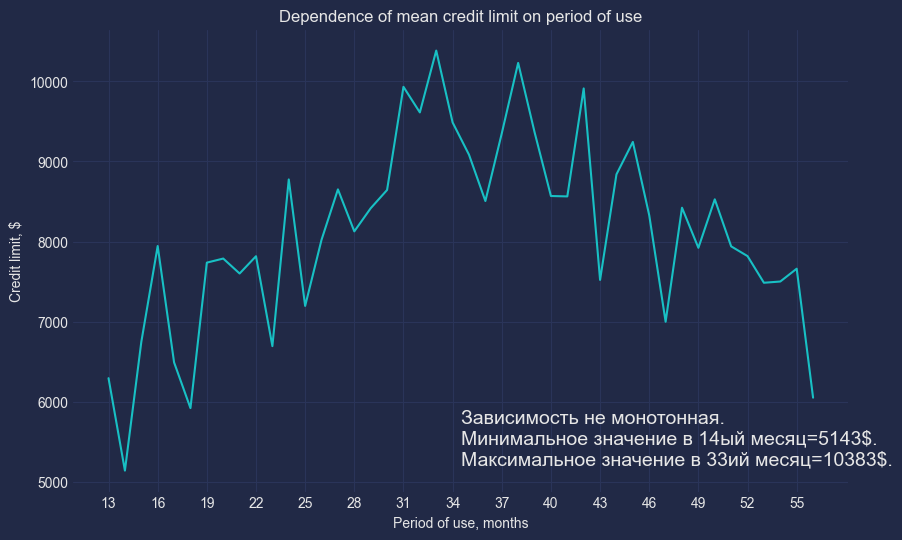

In [10]:
figure = plt.figure(figsize=(10, 6))
plt.plot(months, limits)
plt.title('Dependence of mean credit limit on period of use')
plt.xlabel('Period of use, months')
plt.ylabel('Credit limit, $')
plt.xticks(np.arange(min(months), max(months), 3), minor=False)
plt.grid(True)
plt.text(0.5, 0.05, line_text, transform=plt.gca().transAxes,
         verticalalignment='bottom', horizontalalignment='left', fontsize=14)
plt.show()
pdf.savefig(figure)

In [11]:
amounts_on_gender = data.groupby('Gender')['Total_Trans_Amt'].agg('mean')
genders = amounts_on_gender.index
female_amount = round(amounts_on_gender['F'], 2)
male_amount = round(amounts_on_gender['M'], 2)

In [12]:
difference = round(male_amount - female_amount)
bar_text = f'Мужчины в среднем потратили\n больше денег за этот год,\n чем женщины.\nРазница={difference}$'

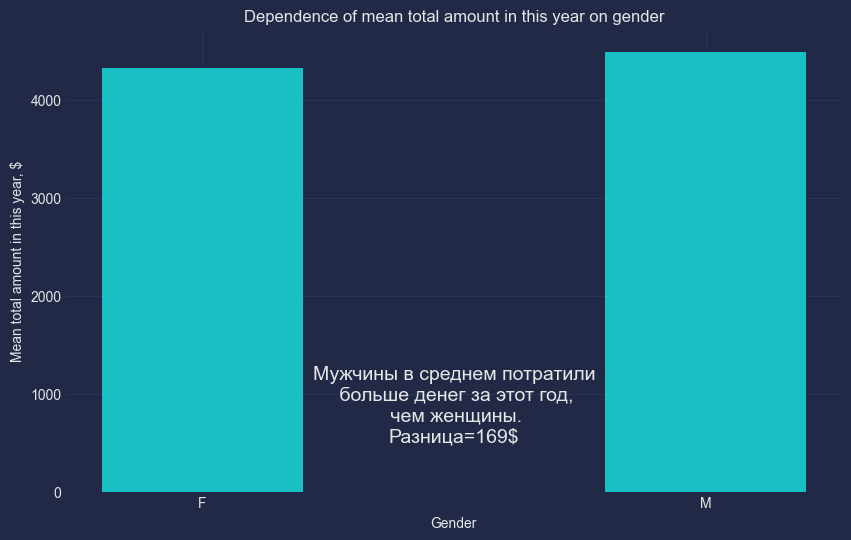

In [13]:
# Bar plot
figure = plt.figure(figsize=(10, 6))
plt.bar(genders, [female_amount, male_amount], width=0.4)
plt.title('Dependence of mean total amount in this year on gender')
plt.xlabel('Gender')
plt.ylabel('Mean total amount in this year, $')
plt.text(0.5, 0.1, bar_text, transform=plt.gca().transAxes,
         verticalalignment='bottom', horizontalalignment='center', fontsize=14)
plt.show()
pdf.savefig(figure)

In [14]:
value_counts = data['Customer_Age'].value_counts()
mode_age = data['Customer_Age'].mode()[0]
rarest_age = value_counts.idxmin()
min_age = min(data['Customer_Age'].values)
max_age = max(data['Customer_Age'].values)
mean_age = round(data['Customer_Age'].mean())
hist_text = f'Мода={mode_age}\nСамый редкий возраст={rarest_age}\nСамый маленький возраст={min_age}\nСамый большой возраст={max_age}\nСредний возраст клиентов={mean_age}' 

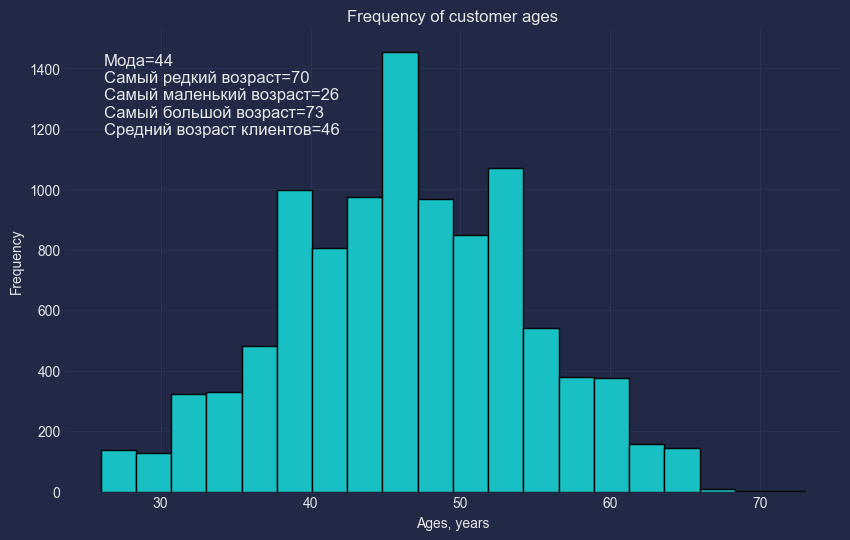

In [15]:
figure = plt.figure(figsize=(10, 6))
plt.hist(data['Customer_Age'], bins=20, edgecolor='black')
plt.title('Frequency of customer ages')
plt.xlabel('Ages, years')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.text(0.05, 0.95, hist_text, transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='left', fontsize=12)
plt.show()
pdf.savefig(figure)

In [16]:
median_count = round(data['Total_Trans_Ct'].median())
box_text = f'Медиана количества транзакций={median_count}\nЕсть значений за "усами" равные~140\n25% перцентиль~80\n75% перцентиль~43\nВерхний ус~135\nНижний ус~10'

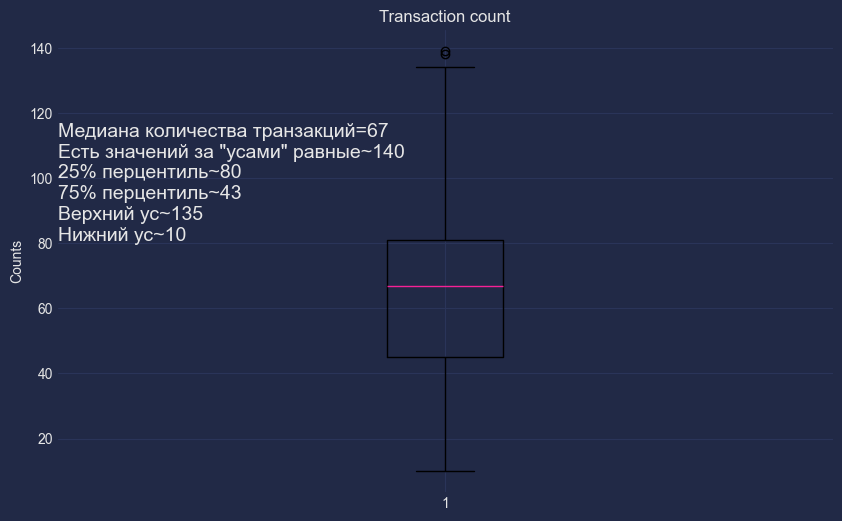

In [17]:
figure = plt.figure(figsize=(10, 6))
plt.boxplot(data['Total_Trans_Ct'], vert=True)
plt.ylabel('Counts')
plt.title('Transaction count')
plt.text(0.0, 0.8, box_text, transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='left', fontsize=14)
plt.show()
pdf.savefig(figure)

In [18]:
heatmap_data = data[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',	'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',	'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']]
mask = np.triu(heatmap_data.corr())

In [19]:
heatmap_text = f'Кредитный лимит и доступные деньги на покупку по кредиту\n\
являются одиним и тем же, что также показывает их корерляция.\
\nПрисутствует сильная корреляция между\nколичеством и суммов операций'

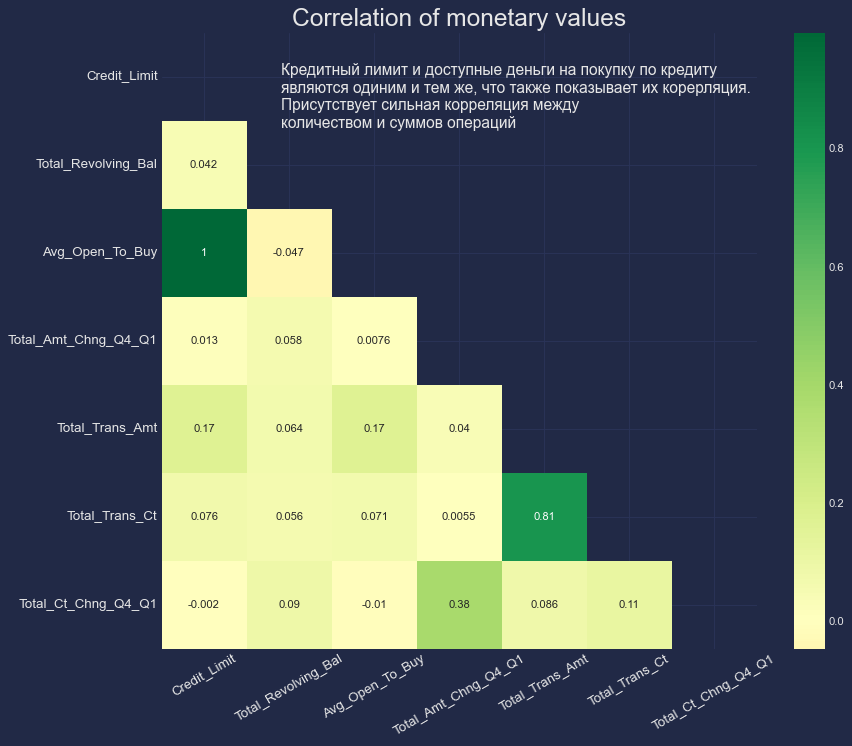

In [20]:
figure = plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(heatmap_data.corr(), mask=mask, xticklabels=heatmap_data.corr().columns, yticklabels=heatmap_data.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Correlation of monetary values', fontsize=22)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.text(0.2, 0.95, heatmap_text, transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='left', fontsize=14)
plt.show()
pdf.savefig(figure)

In [21]:
categories, category_counts = np.unique(data['Income_Category'], return_counts=True)
pie_text = f'Большинство клиентов зарабатывают меньше 40k$ в год.\nЕсть клиенты, доходы которых банк не знает.'

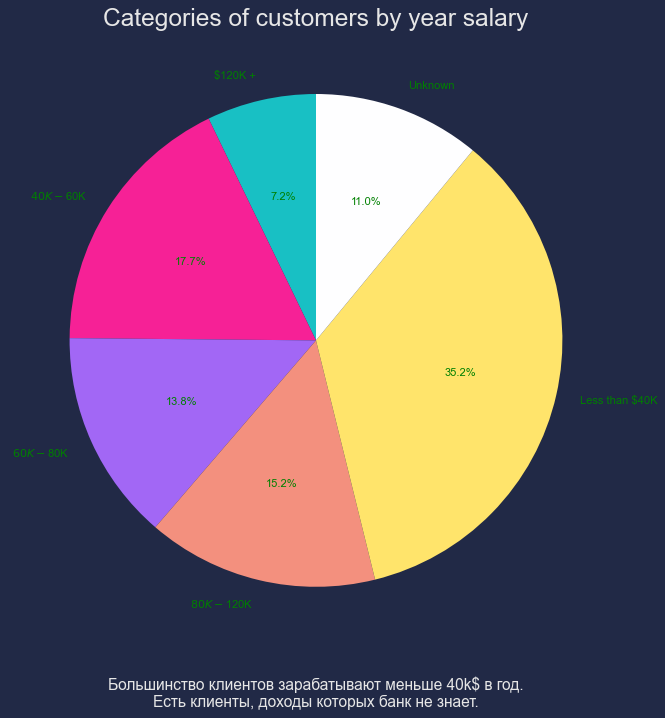

In [22]:
figure = plt.figure(figsize=(12,10), dpi= 80)

plt.title('Categories of customers by year salary', fontsize=22)
plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90, textprops={'color': 'green'})
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.text(0.5, -0.1, pie_text, transform=plt.gca().transAxes,
         verticalalignment='bottom', horizontalalignment='center', fontsize=14)
plt.show()
pdf.savefig(figure)

In [23]:
density_text = f"Держателей 'blue' карт больше всего.\nДержателей 'platimun' карт меньше всего.\nСамое частое количество трат по 'blue', 'silver', 'gold' примерно 80."

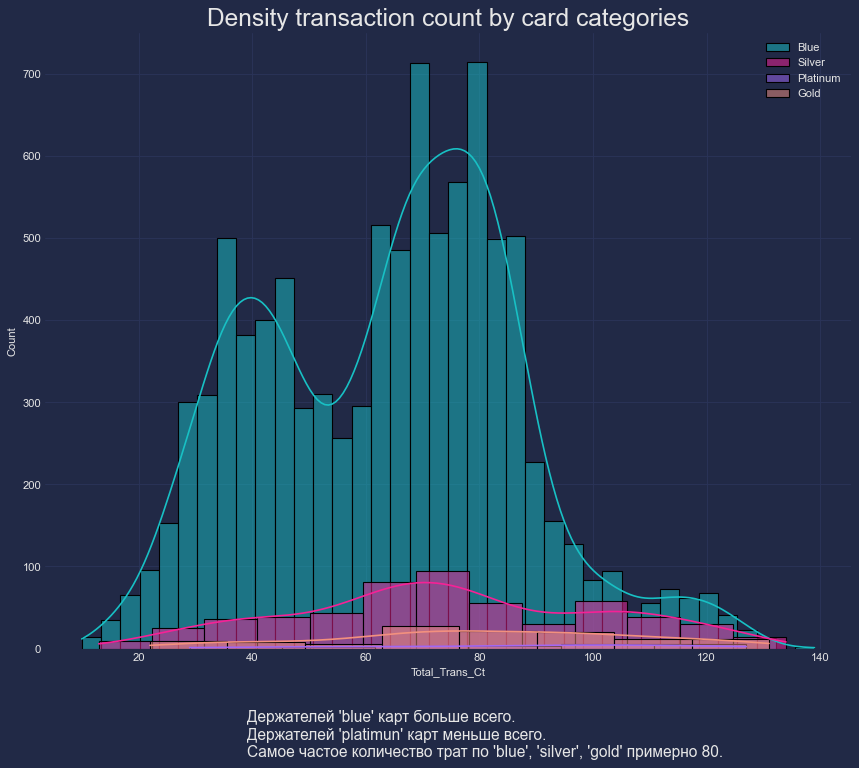

In [24]:
figure = plt.figure(figsize=(13,10), dpi= 80)
sns.histplot(data.loc[data['Card_Category'] == 'Blue', "Total_Trans_Ct"], label="Blue", kde=True)
sns.histplot(data.loc[data['Card_Category'] == 'Silver', "Total_Trans_Ct"], label="Silver", kde=True)
sns.histplot(data.loc[data['Card_Category'] == 'Platinum', "Total_Trans_Ct"], label="Platinum", kde=True)
sns.histplot(data.loc[data['Card_Category'] == 'Gold', "Total_Trans_Ct"], label="Gold", kde=True)
plt.title('Density transaction count by card categories', fontsize=22)
plt.legend()
plt.text(0.25, -0.1, density_text, transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='left', fontsize=14)
plt.show()
pdf.savefig(figure)

In [25]:
pdf.close()